In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_poisson_deviance
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



In [28]:
#Import data
data = pd.read_csv('/Users/cr24/Desktop/Data Science Assignment/Assignment.csv')
columns = ['AGEPH','agecar','fuelc','usec','fleetc','sportc','coverp','powerc']
freq = data['nbrtotan']
x = data[columns]

In [53]:
print(max(data['nbrtotan']),
min(data['nbrtotan']),
np.mean(data['nbrtotan']))

182.5 0.0 0.15757536112549178


In [29]:
# Categorical variables
dummies = ['agecar','fuelc','usec','fleetc','sportc','coverp','powerc']
x = pd.get_dummies(data=x,columns=dummies)


In [30]:
random = 42
x_train, x_test, y_train, y_test  = train_test_split(x, freq, test_size=0.2, random_state=random)


In [54]:
RegressionTree = DecisionTreeRegressor(criterion='squared_error', random_state=random)
path = RegressionTree.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = np.linspace(0, 1, num=50)

mean, std = [], []

for i in alphas:
 tree = DecisionTreeRegressor(ccp_alpha=i, random_state=random)
# 5 fold cross validation for each alpha value
 scores = cross_val_score(tree, x_train, y_train, cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
 mean.append(scores.mean())
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies
eva_df = pd.DataFrame({'alpha': alphas, 'mean': mean})
eva_df = eva_df.sort_values(['mean'], ascending = False)
eva_df.head

<bound method NDFrame.head of        alpha      mean
25  0.510204 -0.954997
37  0.755102 -0.954997
27  0.551020 -0.954997
28  0.571429 -0.954997
29  0.591837 -0.954997
30  0.612245 -0.954997
31  0.632653 -0.954997
32  0.653061 -0.954997
33  0.673469 -0.954997
34  0.693878 -0.954997
35  0.714286 -0.954997
36  0.734694 -0.954997
38  0.775510 -0.954997
1   0.020408 -0.954997
39  0.795918 -0.954997
40  0.816327 -0.954997
41  0.836735 -0.954997
42  0.857143 -0.954997
43  0.877551 -0.954997
44  0.897959 -0.954997
45  0.918367 -0.954997
46  0.938776 -0.954997
47  0.959184 -0.954997
48  0.979592 -0.954997
26  0.530612 -0.954997
49  1.000000 -0.954997
24  0.489796 -0.954997
23  0.469388 -0.954997
2   0.040816 -0.954997
3   0.061224 -0.954997
4   0.081633 -0.954997
5   0.102041 -0.954997
6   0.122449 -0.954997
7   0.142857 -0.954997
8   0.163265 -0.954997
9   0.183673 -0.954997
10  0.204082 -0.954997
11  0.224490 -0.954997
12  0.244898 -0.954997
13  0.265306 -0.954997
14  0.285714 -0.954997
15  

In [42]:
eva_df

,alpha,mean
17,0.001148,-0.965359
19,0.001283,-0.965853
18,0.001215,-0.965853
15,0.001013,-0.965900
14,0.000945,-0.965900
16,0.001080,-0.965900
24,0.001620,-0.966391
23,0.001553,-0.966391
22,0.001485,-0.966391
21,0.001418,-0.966391


In [ ]:
print('Initial score: ', grid_search.best_score_)
print('Initial parameters:', grid_search.best_params_)

Initial score:  -2.3777864058383003e-05
Initial parameters: {'ccp_alpha': 0.010101010101010102}


In [ ]:
# Get the best parameter and corresponding score
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
best_score = grid_search.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
best_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
best_tree.fit(x_train, y_train)

# Evaluate on the test set
test_score = best_tree.score(x_test, y_test)
print(f"Best ccp_alpha: {best_ccp_alpha}")
print(f"Test set score: {test_score}")


Best ccp_alpha: 0.010101010101010102
Test set score: -1.6442923445048052e-07


In [ ]:
scores = pd.DataFrame(index=range(1, 50), columns=['training score', 'test score'])

# Loop over different tree depths
for depth_tree in range(1, 50):
    RegressionTree = DecisionTreeRegressor(max_depth=depth_tree, criterion='poisson', random_state=42)
    RegressionTree.fit(x_train, y_train)
    
    # Predict on training and test sets
    y_pred_train = RegressionTree.predict(x_train)
    y_pred_test = RegressionTree.predict(x_test)
    
    # Store the results in the DataFrame
    scores.loc[depth_tree, 'training score'] = mean_poisson_deviance(y_train, y_pred_train)
    scores.loc[depth_tree, 'test score'] = mean_poisson_deviance(y_test, y_pred_test)

# Display the head of the DataFrame
print(scores.head())

ValueError: could not convert string to float: '2-5'

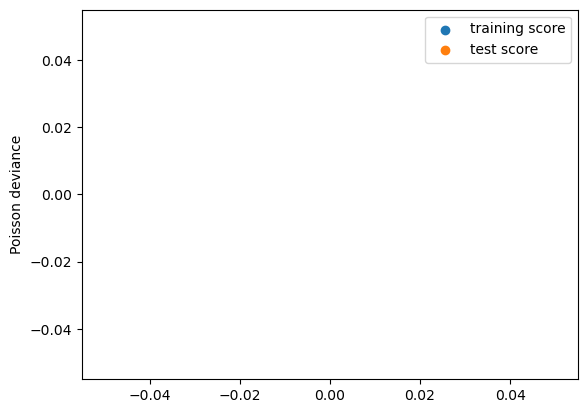

In [ ]:
plt.scatter(scores.index, scores['training score'],label='training score')
plt.scatter(scores.index, scores['test score'],label='test score')
plt.ylabel('Poisson deviance')
plt.legend()

In [ ]:
RegressionTree= DecisionTreeRegressor(max_depth=50,criterion='poisson',random_state=random,min_samples_leaf=100)
RegressionTree.fit(x_train,y_train)
# Assuming x.columns contains the feature names and RegressionTree.feature_importances_ contains the importances
feature_importances = pd.Series(RegressionTree.feature_importances_, index=x.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importances.index, sorted_feature_importances.values)
plt.xlabel('Feature Importance')
plt.title('Feature Importances of the Decision Tree')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

ValueError: could not convert string to float: '2-5'

[Text(0.40325797872340424, 0.9583333333333334, 'AGEPH <= 30.5\npoisson = 0.276\nsamples = 130925\nvalue = 0.124'),
 Text(0.10638297872340426, 0.875, 'AGEPH <= 26.5\npoisson = 0.345\nsamples = 19450\nvalue = 0.184'),
 Text(0.06382978723404255, 0.7916666666666666, 'agecar_2-5 <= 0.5\npoisson = 0.369\nsamples = 9031\nvalue = 0.21'),
 Text(0.0425531914893617, 0.7083333333333334, 'AGEPH <= 23.5\npoisson = 0.378\nsamples = 6271\nvalue = 0.22'),
 Text(0.02127659574468085, 0.625, 'poisson = 0.388\nsamples = 2147\nvalue = 0.24'),
 Text(0.06382978723404255, 0.625, 'poisson = 0.372\nsamples = 4124\nvalue = 0.209'),
 Text(0.0851063829787234, 0.7083333333333334, 'poisson = 0.347\nsamples = 2760\nvalue = 0.188'),
 Text(0.14893617021276595, 0.7916666666666666, 'agecar_>10 <= 0.5\npoisson = 0.321\nsamples = 10419\nvalue = 0.161'),
 Text(0.1276595744680851, 0.7083333333333334, 'AGEPH <= 29.5\npoisson = 0.312\nsamples = 8187\nvalue = 0.155'),
 Text(0.10638297872340426, 0.625, 'agecar_6-10 <= 0.5\npoisso

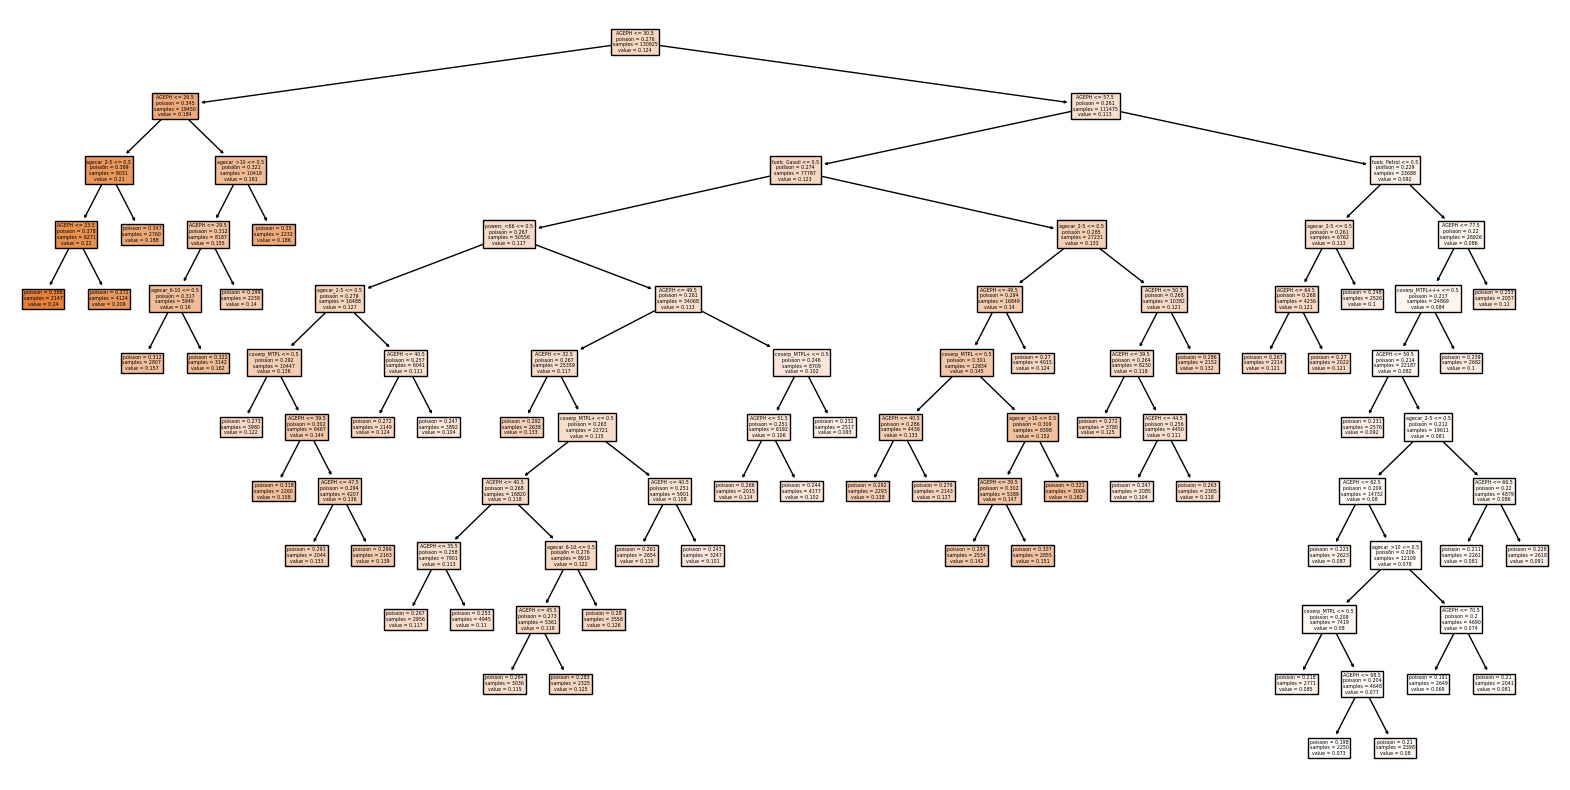

In [ ]:
# Plot the tree
# Convert Index to list for feature_names
feature_names = list(x_train.columns)

# Plot the tree
plt.figure(figsize=(20, 10))  # Set the figure size as needed
tree.plot_tree(RegressionTree, filled=True, feature_names=feature_names)
